## Input parsing

In [1]:
import numpy as np
import seaborn as sb

In [2]:
def parse_grid(inputfile='real_input.txt'):
    with open(inputfile, 'r') as fh:
        data = fh.read()
        lines = data.split('\n')
        grid = [char for char in [list(line) for line in lines]]
        return np.array(grid).astype(int)

In [3]:
grid = parse_grid('real_input.txt')

<AxesSubplot: >

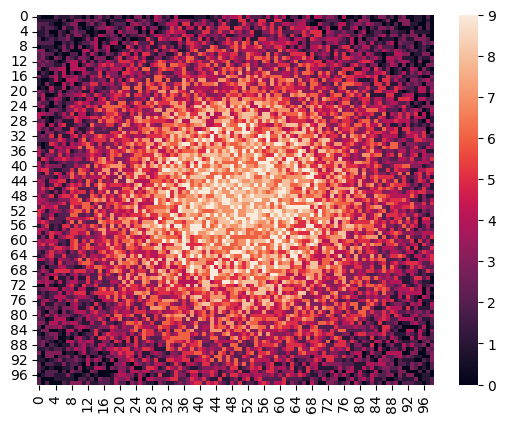

In [4]:
sb.heatmap(grid)

## Part one

In [5]:
def grid_visibility(grid):
    (nx, ny) = np.shape(grid)
    vis_grid = np.array((nx, ny), dtype='int')
    vis_grid = 0
    vis_grid[0, :] = 1
    vis_grid[nx-1, :] = 1
    vis_grid[:, 0] = 1
    vis_grid[:, ny-1] = 1
    for col in np.arange(1,nx-1):
        for row in np.arange(1,ny-1):
            if all(grid[0:col, row]) <= grid[col, row]:
                vis_grid[col, row] = 1
            if all(grid[col+1:, row]) <= grid[col, row]:
                vis_grid[col, row] = 1
            if all(grid[col, 0:row]) <= grid[col,row]:
                vis_grid[col, row] = 1
            if all(grid[col, row+1:]) <= grid[col,row]:
                vis_grid[col, row] = 1
    return vis_grid

In [6]:
def vis_grid(grid):
    (ny, nx) = np.shape(grid)
    vis_grid = np.zeros((ny, nx), dtype='int')
    vis_grid[0, :] = 1
    vis_grid[ny-1, :] = 1
    vis_grid[:, 0] = 1
    vis_grid[:, nx-1] = 1
    for col in np.arange(1,ny-1):
        for row in np.arange(1,nx-1):
            # print(row, col, grid[row, col], grid[row, 0:col], grid[row, 0:col] < grid[row, col], np.all(grid[row, 0:col] < grid[row, col]))
            if np.all(grid[row, col] > grid[row, 0:col]):
                # print(" setting ", row, col, " to ", 5)
                vis_grid[row, col] = 1
            if np.all(grid[row, col] > grid[row, col+1:]):
                vis_grid[row, col] = 1
            if np.all(grid[row, col] > grid[0:row, col]):
                vis_grid[row, col] = 1
            if np.all(grid[row, col] > grid[row+1:, col]):
                vis_grid[row, col] = 1
    return vis_grid

## Answer 1

In [7]:
np.count_nonzero(vis_grid(grid))

1796

## Part two

In [8]:
def scenic_score(grid):
    (ny, nx) = np.shape(grid)
    score_grid = np.zeros((ny, nx), dtype='int')
    for col in  np.arange(0,ny):
        for row in np.arange(0,nx):
            my_height = grid[row, col]
            
            # look up
            score_north = 0
            for look_row in np.arange(row-1, -1, -1):
                score_north += 1
                if grid[look_row, col] >= my_height:
                    break

            # look left
            score_left = 0
            for look_col in np.arange(col-1, -1, -1):
                score_left += 1
                if grid[row, look_col] >= my_height:
                    break
                
            # Look right
            score_right = 0
            for look_col in np.arange(col+1, nx, 1):
                score_right += 1
                if grid[row, look_col] >= my_height:
                    break
                    
            # Look down
            score_south = 0
            for look_row in np.arange(row+1, ny, 1):
                score_south += 1
                if grid[look_row, col] >= my_height:
                    break
                    
            score_grid[row, col] = score_left * score_right * score_north * score_south
            
    return score_grid

In [9]:
scores = scenic_score(grid)

<AxesSubplot: >

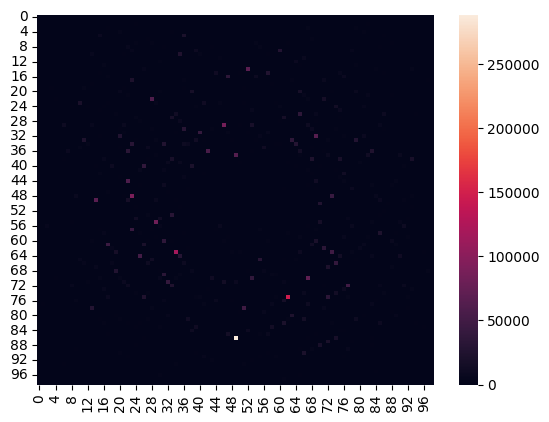

In [10]:
sb.heatmap(scores)

## Answer 2

In [11]:
scores.max()

288120